In [1]:
! pip install pydrive

    100% |████████████████████████████████| 993kB 8.2MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from itertools import product

In [0]:
def copy_directory(source_id, local_target):
  try:
    os.makedirs(local_target)
  except: 
    pass
  k = 0
  print('folder id: %s' % (source_id))
  print('downloading to: %s' % (local_target)) 
  file_list = drive.ListFile(
    {'q': "'{source_id}' in parents".format(source_id=source_id)}).GetList()
  for f in file_list:
    if f["title"].startswith("."):
      continue
    fname = os.path.join(local_target, f['title'])
    if f['mimeType'] == 'application/vnd.google-apps.folder':
      copy_directory(f['id'], fname)
    else:
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(fname)
      k += 1
  print('downloaded files: {}'.format(k))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(40,40)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
training_path = os.path.expanduser('~/data/Training')
testing_path = os.path.expanduser('~/data/Testing')
prediction_path = os.path.expanduser('~/data/Prediction')
try:
  os.makedirs(training_path)
  os.makedirs(testing_path)
  os.makedirs(prediction_path)  
except: pass

In [7]:
copy_directory('1aM5XbStClMulA5CShCD9tfkYqAUjCCpX','~/data/Training')  

folder id: 1aM5XbStClMulA5CShCD9tfkYqAUjCCpX
downloading to: ~/data/Training
folder id: 1mx5TBRm4vVmdOsPQJdq1d5qw9ctWc8B-
downloading to: ~/data/Training/00057
downloaded files: 84
folder id: 1u0tlqDdHvZV1hJl019-XoCG7fFjITus_
downloading to: ~/data/Training/00055
downloaded files: 12
folder id: 1_rXkNqooP8wHa3zPFMUq9vaa3x5xLhov
downloading to: ~/data/Training/00054
downloaded files: 118
folder id: 11cPrN6p9kk7PXqyplN1wEnin1AaE2Y74
downloading to: ~/data/Training/00053
downloaded files: 199
folder id: 1Pr39K2HPRzk6wx9N0WMk7ZB0v2C1dmgD
downloading to: ~/data/Training/00056
downloaded files: 95
folder id: 1C9cWAUvYnClkyWBe7keryVVOjRx_taPu
downloading to: ~/data/Training/00058
downloaded files: 15
folder id: 1K8usvAi5gnwwXn7AZClaBybMOiZ9T5JE
downloading to: ~/data/Training/00052
downloaded files: 27
folder id: 1RWh6iVAHCpE-vR9IBwNO56Fpb_X4M1gr
downloading to: ~/data/Training/00061
downloaded files: 282
folder id: 1TwA3ZnsNIgc_UprcWUS1NyBL0USTP-0N
downloading to: ~/data/Training/00060
downl

downloaded files: 42
folder id: 1-Wg1TxuVje6_f03DpcmjkkbJMtuvwWxq
downloading to: ~/data/Training/00022
downloaded files: 375
folder id: 19vxjagORkKgxAACVFA2Y0aBDcKG_RDbf
downloading to: ~/data/Training/00018
downloaded files: 81
folder id: 1s_7ZRUhTP-h2Slp8CnqIBEEgFnO9kPNb
downloading to: ~/data/Training/00017
downloaded files: 79
folder id: 1I22w9BFMHCL0TrFdAumRTlsKHVSq3LZg
downloading to: ~/data/Training/00016
downloaded files: 9
folder id: 1RVwiH6nEVsdbvLjBRZMF03yil1-bJPNS
downloading to: ~/data/Training/00015
downloaded files: 9
folder id: 1cVlQRTienxYOeL9DgKNPKY3LGku345md
downloading to: ~/data/Training/00009
downloaded files: 18
folder id: 1EpQCq5-o9_NlhTZmEiEzM3xXp4Ao5Sup
downloading to: ~/data/Training/00011
downloaded files: 7
folder id: 1-0IuweoNh2MdQKgUALjmrOyPV9gJpLHD
downloading to: ~/data/Training/00014
downloaded files: 43
folder id: 1YhkzgHy8lK1cjVxpCYPSF7HisuIDJAEe
downloading to: ~/data/Training/00013
downloaded files: 90
folder id: 1BCH2RKrH6EZHMMIDhrx0qwtvGux-Y9Yc


In [8]:
copy_directory('1PVPjRT22MRPHkiyqCdEeKp3OGiaSUk_C','~/data/Testing')  

folder id: 1PVPjRT22MRPHkiyqCdEeKp3OGiaSUk_C
downloading to: ~/data/Testing
folder id: 1MEYyG00CDI2INl84PbecjwpKEyBJvk-P
downloading to: ~/data/Testing/00009
downloaded files: 1
folder id: 1u83OYC8fA72AdijjQ7rd56NZ3EJs-4RK
downloading to: ~/data/Testing/00011
downloaded files: 1
folder id: 1QmaUrXYV-dnc6mXke_0y8i_6_3Jj4Gs_
downloading to: ~/data/Testing/00015
downloaded files: 1
folder id: 1wLAYtt2I5sASij8jVaK0KgAUIw3lxeWh
downloading to: ~/data/Testing/00026
downloaded files: 1
folder id: 1Z7oa58zDlaqyJaGT6kTSzvDUYkd8uKbY
downloading to: ~/data/Testing/00033
downloaded files: 1
folder id: 1ss3yOtwDeRAjRUTCkvG2ezJ9BZsst6eX
downloading to: ~/data/Testing/00036
downloaded files: 1
folder id: 1DPg6teSsVjSfqVUCdEjmECigQqXgRnHW
downloading to: ~/data/Testing/00048
downloaded files: 1
folder id: 1bGhqEefobtfmc-lAG7M_K_IqiCLV2GiH
downloading to: ~/data/Testing/00050
downloaded files: 1
folder id: 15s0tSZor3q04fWyqbVJ695Zlbt0NfpVW
downloading to: ~/data/Testing/00052
downloaded files: 1
folder

downloaded files: 39
folder id: 166vYVpYePC9QWroWB4qwJZOa8ZYhs5IA
downloading to: ~/data/Testing/00016
downloaded files: 12
folder id: 124Pu86vJHDL9BcrLOskskMfKsSKvSI3g
downloading to: ~/data/Testing/00018
downloaded files: 122
folder id: 1TU9XXLHf_Fh7Rm19ywK_KzqZM_gwug9M
downloading to: ~/data/Testing/00020
downloaded files: 3
folder id: 1WxTNnveG6Sfnd6w_e6nSoJmxGU2pQlWt
downloading to: ~/data/Testing/00022
downloaded files: 61
folder id: 1l47aEPL92dJCspUmNei8tD4v4qLQgGgB
downloading to: ~/data/Testing/00012
downloaded files: 3
folder id: 1ueopkcGNWhnL6yy_GTuwidDggIssnayL
downloading to: ~/data/Testing/00019
downloaded files: 163
folder id: 1IwN3THfDTAxjR45HXhDYzLLEOi5s7X5o
downloading to: ~/data/Testing/00017
downloaded files: 183
folder id: 1D15y3A2NDYmUKLwDEdrn6y8RK7_4sqnH
downloading to: ~/data/Testing/00014
downloaded files: 15
folder id: 1iBH6p9XrxyEiVYhVap8NH5XHOFScdWsw
downloading to: ~/data/Testing/00021
downloaded files: 45
folder id: 1hTHDeQwfT5Q4tnzefM8pEx0n_5t9wGg2
downlo

In [50]:
copy_directory('1t7xxFxNW_O2WRYMsVKcxrQ6vYBIMd5yG','~/data/Prediction')  

folder id: 1t7xxFxNW_O2WRYMsVKcxrQ6vYBIMd5yG
downloading to: ~/data/Prediction
downloaded files: 4


In [10]:
os.listdir('~/data')

['Training', 'Testing', 'Prediction']

In [0]:
num_epoch = 15

In [109]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)
training_set = train_datagen.flow_from_directory('~/data/Training', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory('~/data/Testing', target_size=(64, 64), batch_size=32, class_mode='categorical')

Found 4575 images belonging to 62 classes.
Found 2529 images belonging to 62 classes.


In [110]:
print(len(training_set.filenames))
indices = training_set.class_indices
print(indices)
print(len(test_set.class_indices))
print(len(test_set.filenames))
indices = test_set.class_indices
print(indices)
print(len(test_set.class_indices))

4575
{'00000': 0, '00001': 1, '00002': 2, '00003': 3, '00004': 4, '00005': 5, '00006': 6, '00007': 7, '00008': 8, '00009': 9, '00010': 10, '00011': 11, '00012': 12, '00013': 13, '00014': 14, '00015': 15, '00016': 16, '00017': 17, '00018': 18, '00019': 19, '00020': 20, '00021': 21, '00022': 22, '00023': 23, '00024': 24, '00025': 25, '00026': 26, '00027': 27, '00028': 28, '00029': 29, '00030': 30, '00031': 31, '00032': 32, '00033': 33, '00034': 34, '00035': 35, '00036': 36, '00037': 37, '00038': 38, '00039': 39, '00040': 40, '00041': 41, '00042': 42, '00043': 43, '00044': 44, '00045': 45, '00046': 46, '00047': 47, '00048': 48, '00049': 49, '00050': 50, '00051': 51, '00052': 52, '00053': 53, '00054': 54, '00055': 55, '00056': 56, '00057': 57, '00058': 58, '00059': 59, '00060': 60, '00061': 61}
62
2529
{'00000': 0, '00001': 1, '00002': 2, '00003': 3, '00004': 4, '00005': 5, '00006': 6, '00007': 7, '00008': 8, '00009': 9, '00010': 10, '00011': 11, '00012': 12, '00013': 13, '00014': 14, '000

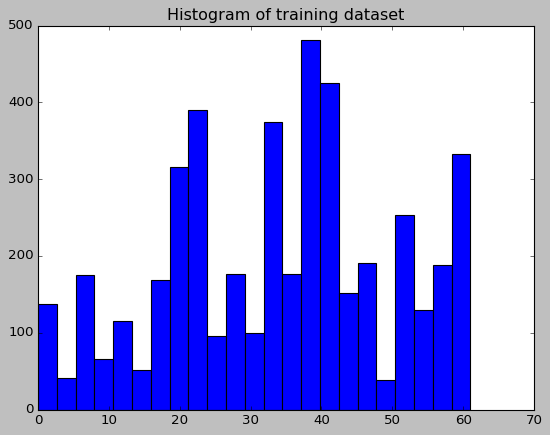

In [111]:
import matplotlib.pyplot as plt
plt.hist(training_set.classes, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of training dataset")
plt.show()

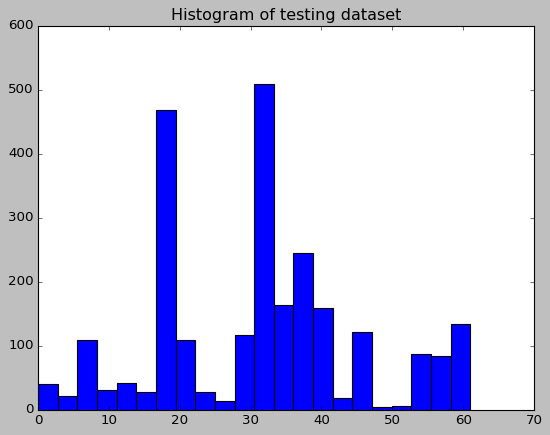

In [112]:
import matplotlib.pyplot as plt
plt.hist(test_set.classes, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of testing dataset")
plt.show()

In [0]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten(input_shape=classifier.output_shape[1:]))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 62, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [114]:
classifier.summary()
classifier.get_config()
classifier.layers[0].get_config()
classifier.layers[0].input_shape			
classifier.layers[0].output_shape			
classifier.layers[0].get_weights()
np.shape(classifier.layers[0].get_weights()[0])
classifier.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
__________

True

In [0]:
hist = classifier.fit_generator(training_set,steps_per_epoch = 4575, epochs = num_epoch, validation_data = test_set, validation_steps = 2520)
classifier.save('my_classifier_OK.h5')

Epoch 1/15
 991/4575 [=====>........................] - ETA: 3:56 - loss: 0.7842 - acc: 0.7956

2190/4575 [=============>................] - ETA: 2:37 - loss: 0.4472 - acc: 0.8785

3202/4575 [===================>..........] - ETA: 1:30 - loss: 0.3389 - acc: 0.9067

4265/4575 [==========================>...] - ETA: 20s - loss: 0.2729 - acc: 0.9240

4487/4575 [============================>.] - ETA: 5s - loss: 0.2629 - acc: 0.9267

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
uploaded = drive.CreateFile()
uploaded.SetContentFile('my_classifier_OK.h5')
uploaded.Upload()

In [0]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

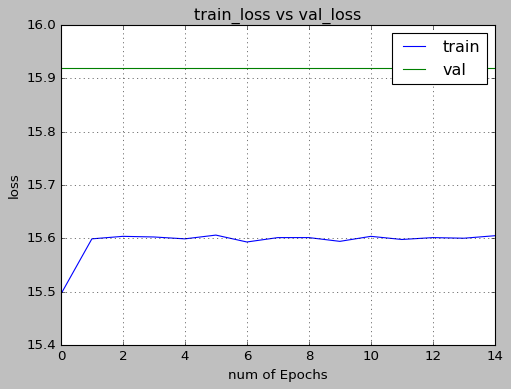

In [97]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

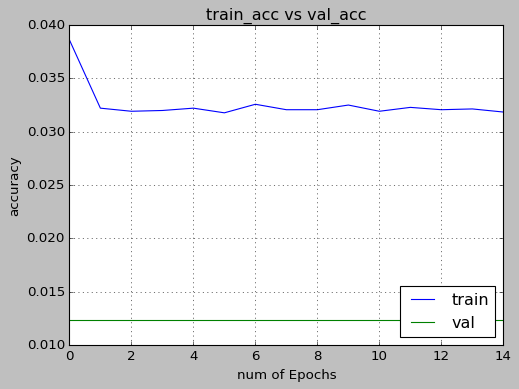

In [98]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [99]:
# Evaluating the model
score = classifier.evaluate_generator(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 15.920522857532523
Test accuracy: 0.012257809422618554


In [0]:
model = load_model('my_classifier.h5')

In [104]:
test_image = image.load_img('~/data/Prediction/00017_00002.ppm', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
#probabilities  = model.predict_generator(test_datagen, steps=None)
print(test_set)

Normalized confusion matrix
[[0.66666667 0.33333333 0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.42857143 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.63636364 0.27272727]
 [0.         0.         0.         ... 0.         0.         1.        ]]


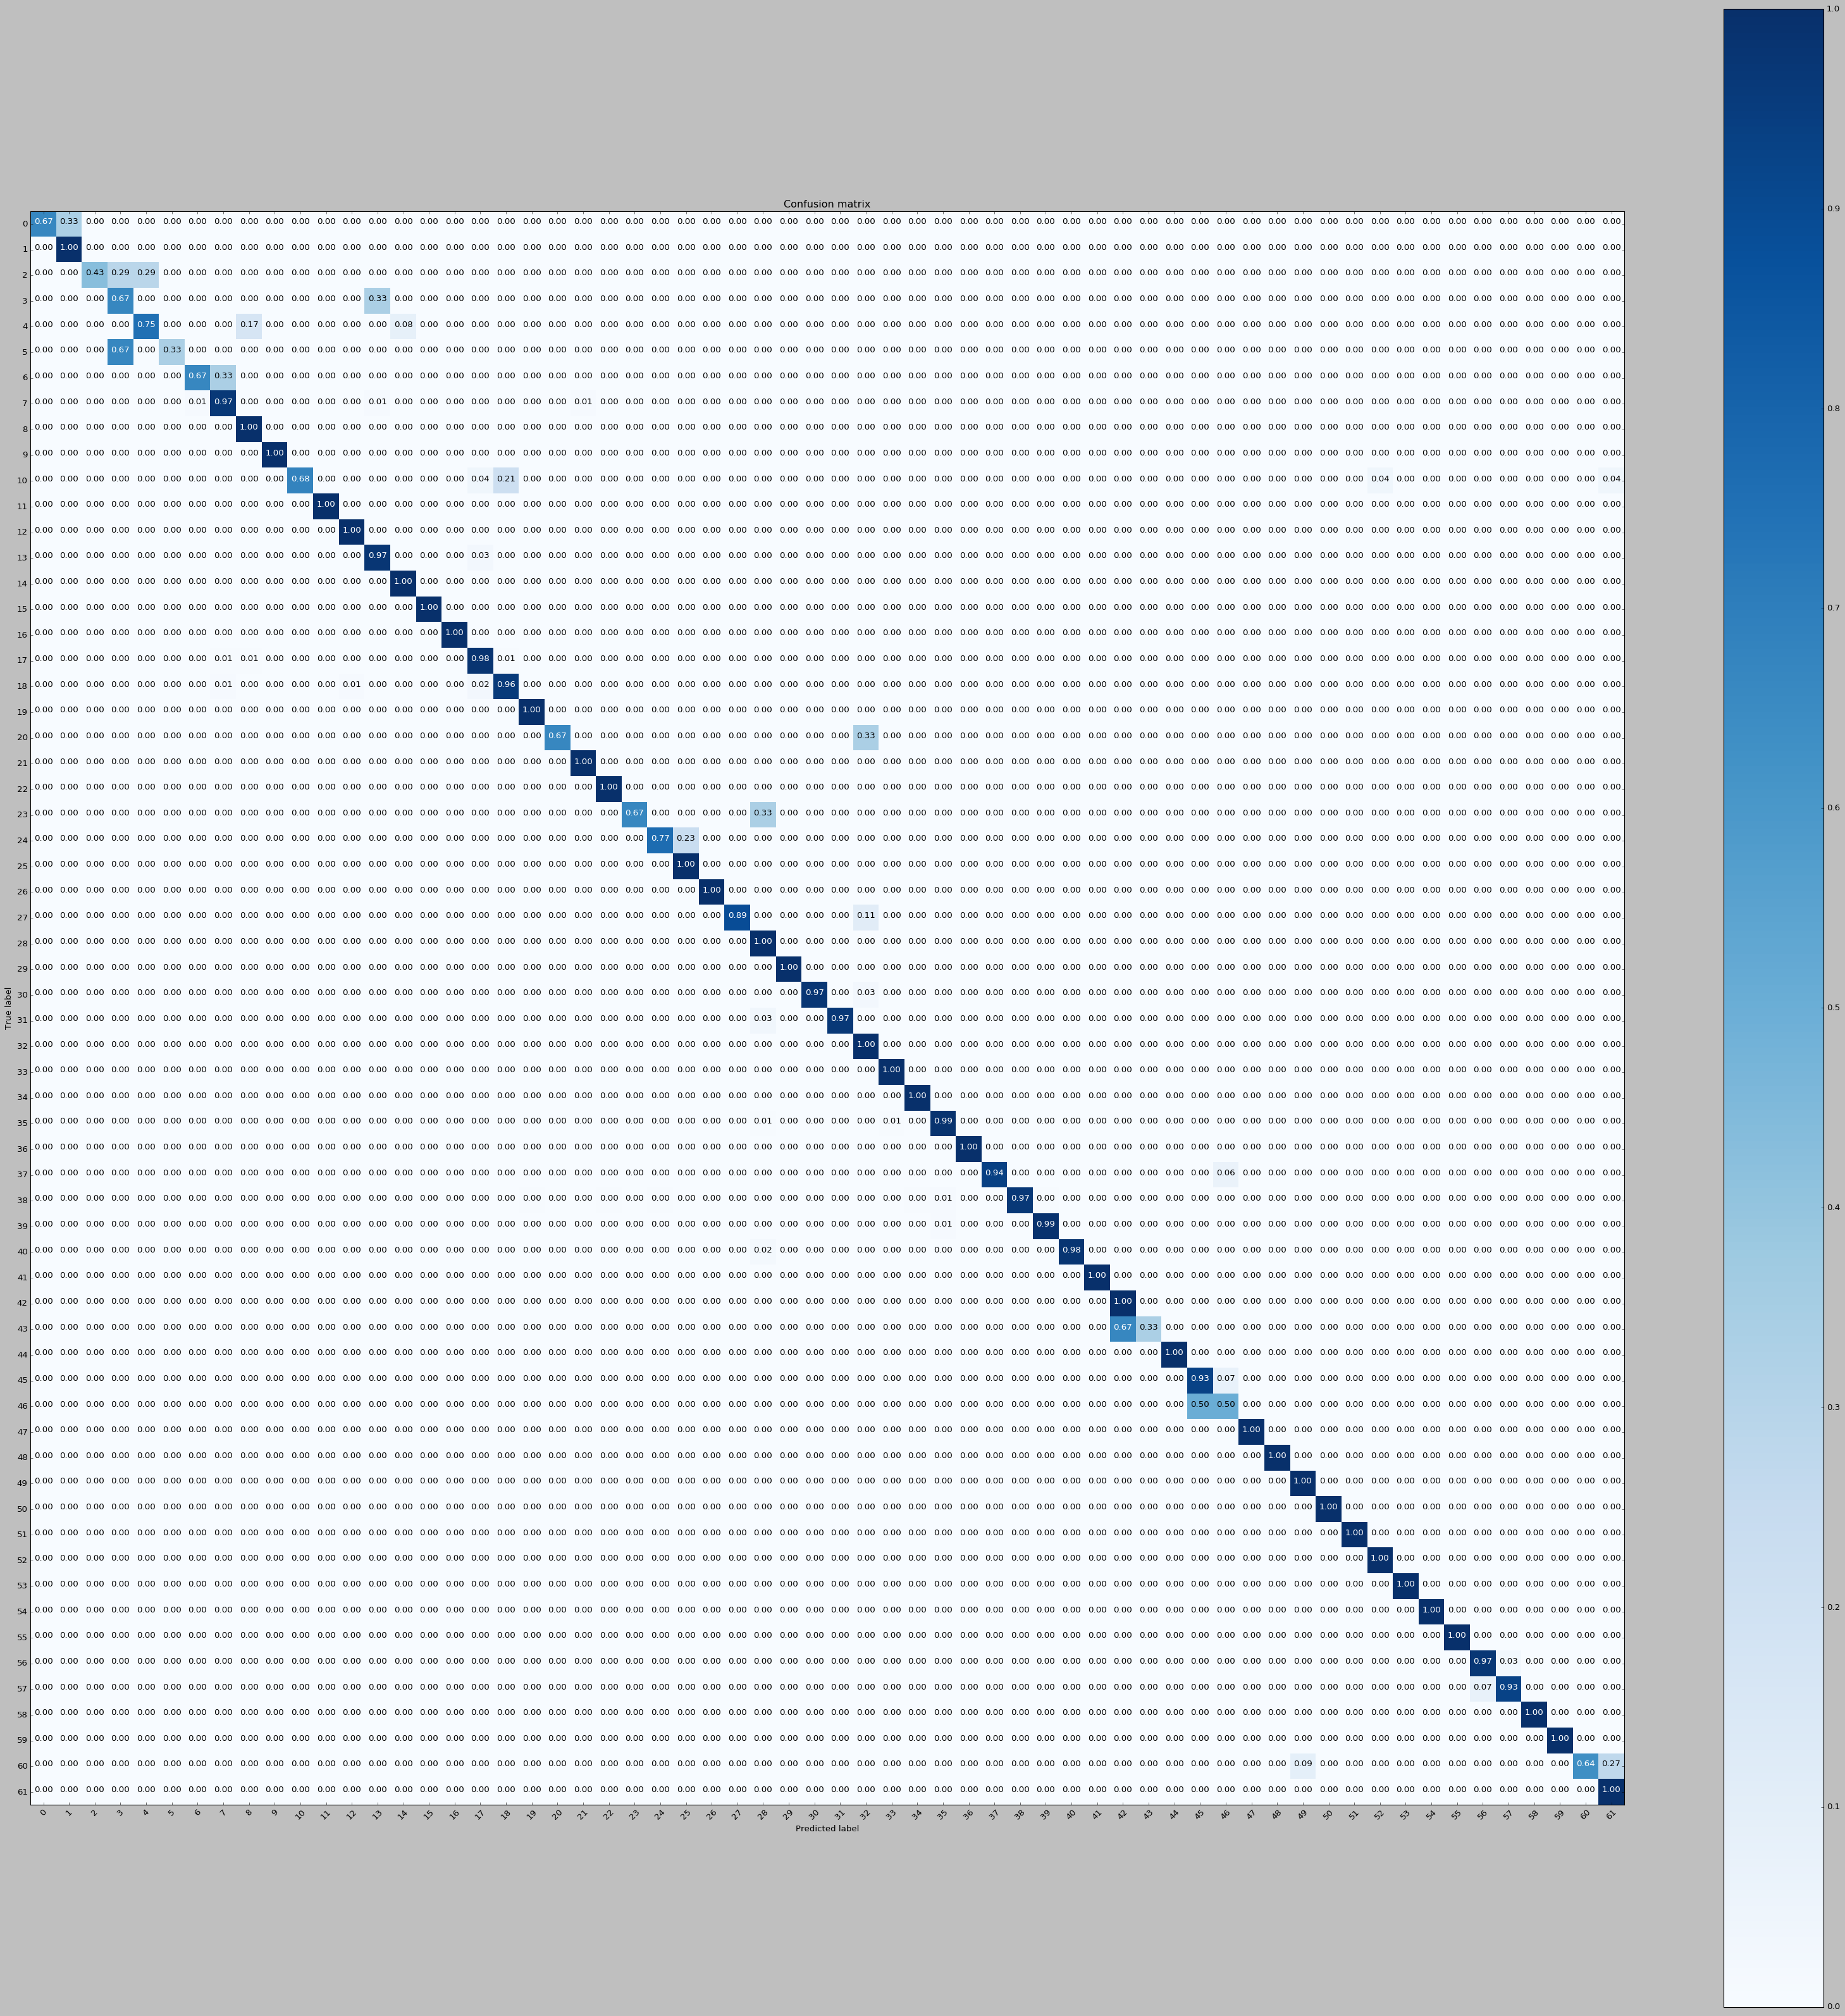

In [105]:
test_set.reset()
probabilities  = model.predict_generator(test_set)
y_pred = np.argmax(probabilities , axis=1)


cnf_matrix = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cnf_matrix, list(range(0, 62)), True)